In [9]:
# https://medium.com/unit8-machine-learning-publication/darts-time-series-made-easy-in-python-5ac2947a8878
# https://github.com/unit8co/darts

Basically, Darts is based on the following simple principles:

There are two kinds of models. 

- Forecasting models predict the future values of a time series given the past values, and regression models predict values of a target time series given a set of feature time series. The exponential smoothing and auto-ARIMA model we built above are examples of forecasting models.

- Unified fit() and predict() interface across all forecasting models, from ARIMA to neural networks.

- Models consume and produce TimeSeries, which means for instance that it is easy to have a regression model consume the output of a forecasting model.

- TimeSeries can be either univariate (1-dimensional) or multivariate (multi-dimensional). Certain models such as those based on neural nets operate on multivariate series, while others are restricted to univariate series.

- Immutability: the TimeSeries class is designed to be immutable.

Darts already contains working implementations of the following forecasting models:
- Exponential smoothing,
- ARIMA & auto-ARIMA,
- Facebook Prophet,
- Theta method,
- FFT (Fast Fourier Transform),
- Recurrent neural networks (vanilla RNNs, GRU, and LSTM variants),
- Temporal Convolutional Networks (TCN),and several naive baselines.

The library also contains functionalities to backtest forecasting and regression models, perform grid search on hyper-parameters, evaluate residuals, and even perform automatic model selection.
Another Example — Backtesting


In [8]:
#pip install u8darts


In [3]:
import pandas as pd
from darts import TimeSeries
df = pd.read_csv('../data/external/AirPassengers.csv')
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

In [4]:
from darts.models import ExponentialSmoothing
train, val = series.split_before(pd.Timestamp('19580101'))
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

Importing plotly failed. Interactive plots will not work.
/Users/tomas/miniconda3/envs/darts_timeseries/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


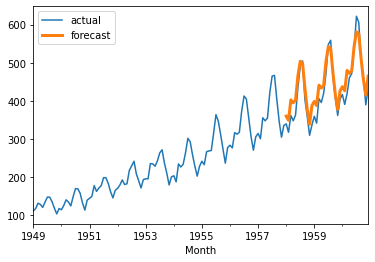

In [5]:
import matplotlib.pyplot as plt
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

In [6]:
from darts.models import AutoARIMA
model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))


/Users/tomas/miniconda3/envs/darts_timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tomas/miniconda3/envs/darts_timeseries/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/tomas/miniconda3/envs/darts_timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tomas/miniconda3/envs/darts_timeseries/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/tomas/minicond